# Load and preprocess data

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd

# load train data
train_df = pd.read_csv("heart1_train.csv")
train_df.head()

# load test data
test_df = pd.read_csv("heart1_test.csv")
test_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,49,M,NAP,120,188,0,Normal,139,N,Flat,1
1,54,M,ASY,122,286,0,LVH,116,Y,Flat,1
2,57,M,ASY,152,274,0,Normal,88,Y,Flat,1
3,65,F,NAP,160,360,0,LVH,151,N,Up,0
4,54,M,NAP,125,273,0,LVH,152,N,Down,0


In [2]:
# extract input features for train data

train_features = train_df[["Age","ChestPainType","RestingBP",
                          "FastingBS","RestingECG","MaxHR",
                           "ExerciseAngina", "ST_Slope"]]

train_labels = train_df["HeartDisease"]

# extract input features for test data

test_inputs = test_df[["Age","ChestPainType","RestingBP",
                          "FastingBS","RestingECG","MaxHR",
                           "ExerciseAngina", "ST_Slope"]]

y_actual = test_df["HeartDisease"]

# display dataframes and datatype info
train_features.head()
train_features.info()
train_features.describe()
train_labels.head()
train_labels.info()

test_inputs.head()
test_inputs.info()
test_inputs.describe()
y_actual.head()
y_actual.info()

,Age,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope
0,40,ATA,140,0,Normal,172,N,Up
1,49,NAP,160,0,Normal,156,N,Flat
2,37,ATA,130,0,ST,98,N,Up
3,48,ASY,138,0,Normal,108,Y,Flat
4,54,NAP,150,0,Normal,122,N,Up


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             735 non-null    int64 
 1   ChestPainType   735 non-null    object
 2   RestingBP       735 non-null    int64 
 3   FastingBS       735 non-null    int64 
 4   RestingECG      735 non-null    object
 5   MaxHR           735 non-null    int64 
 6   ExerciseAngina  735 non-null    object
 7   ST_Slope        735 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.1+ KB


,Age,RestingBP,FastingBS,MaxHR
count,735.000000,735.000000,735.000000,735.000000
mean,53.306122,132.491156,0.255782,133.172789
std,9.512943,18.835647,0.436597,24.882532
min,28.000000,0.000000,0.000000,60.000000
25%,47.000000,120.000000,0.000000,116.000000
50%,54.000000,130.000000,0.000000,132.000000
75%,60.000000,140.000000,1.000000,150.000000
max,77.000000,200.000000,1.000000,190.000000


,HeartDisease
0,0
1,1
2,0
3,1
4,0


<class 'pandas.core.series.Series'>
RangeIndex: 735 entries, 0 to 734
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
735 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


,Age,ChestPainType,RestingBP,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope
0,49,NAP,120,0,Normal,139,N,Flat
1,54,ASY,122,0,LVH,116,Y,Flat
2,57,ASY,152,0,Normal,88,Y,Flat
3,65,NAP,160,0,LVH,151,N,Up
4,54,NAP,125,0,LVH,152,N,Down


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             183 non-null    int64 
 1   ChestPainType   183 non-null    object
 2   RestingBP       183 non-null    int64 
 3   FastingBS       183 non-null    int64 
 4   RestingECG      183 non-null    object
 5   MaxHR           183 non-null    int64 
 6   ExerciseAngina  183 non-null    object
 7   ST_Slope        183 non-null    object
dtypes: int64(4), object(4)
memory usage: 11.6+ KB


,Age,RestingBP,FastingBS,MaxHR
count,183.000000,183.000000,183.000000,183.000000
mean,54.333333,132.016393,0.142077,151.415301
std,9.081640,17.206080,0.350086,22.387256
min,29.000000,94.000000,0.000000,88.000000
25%,49.000000,120.000000,0.000000,139.500000
50%,55.000000,130.000000,0.000000,155.000000
75%,61.000000,140.000000,0.000000,167.500000
max,77.000000,192.000000,1.000000,202.000000


,HeartDisease
0,1
1,1
2,1
3,0
4,0


<class 'pandas.core.series.Series'>
RangeIndex: 183 entries, 0 to 182
Series name: HeartDisease
Non-Null Count  Dtype
--------------  -----
183 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


# Feature Transformation

In [3]:
def featurize(df):
    X = df[['ChestPainType','RestingECG','ExerciseAngina', 'ST_Slope', 'Age', 'RestingBP', 'FastingBS', 'MaxHR']]
    print (X)
    X['ExerciseAngina'] = [1 if x=='Y' else 0 for x in df['ExerciseAngina']]

    ChestPainTypes_groups = {
        'TA':0,'ATA': 1,'NAP':2,
        'ASY':3}
    RestingECG_groups = {
        'Normal':0,'ST': 1,'LVH':2}
    ST_Slope_groups = {
        'Up':0,'Flat': 1,'Down':2}

    X['ChestPainType'] = [ChestPainTypes_groups.get(x.strip()) for x in df['ChestPainType']]
    X['RestingECG'] = [RestingECG_groups.get(x.strip()) for x in df['RestingECG']]
    X['ST_Slope'] = [ST_Slope_groups.get(x.strip()) for x in df['ST_Slope']]
    return X

X_train_features = featurize(train_features)
display(X_train_features.head())

X_test_inputs = featurize(test_inputs)
display(X_test_inputs.head())

    ChestPainType RestingECG ExerciseAngina ST_Slope  Age  RestingBP  \
0             ATA     Normal              N       Up   40        140   
1             NAP     Normal              N     Flat   49        160   
2             ATA         ST              N       Up   37        130   
3             ASY     Normal              Y     Flat   48        138   
4             NAP     Normal              N       Up   54        150   
..            ...        ...            ...      ...  ...        ...   
730           ATA     Normal              N     Flat   49        134   
731           ASY        LVH              N       Up   46        120   
732           ASY        LVH              Y     Down   56        200   
733            TA     Normal              N     Down   66        150   
734           ASY        LVH              Y     Down   56        130   

     FastingBS  MaxHR  
0            0    172  
1            0    156  
2            0     98  
3            0    108  
4            0 

,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,FastingBS,MaxHR
0,1,0,0,0,40,140,0,172
1,2,0,0,1,49,160,0,156
2,1,1,0,0,37,130,0,98
3,3,0,1,1,48,138,0,108
4,2,0,0,0,54,150,0,122


    ChestPainType RestingECG ExerciseAngina ST_Slope  Age  RestingBP  \
0             NAP     Normal              N     Flat   49        120   
1             ASY        LVH              Y     Flat   54        122   
2             ASY     Normal              Y     Flat   57        152   
3             NAP        LVH              N       Up   65        160   
4             NAP        LVH              N     Down   54        125   
..            ...        ...            ...      ...  ...        ...   
178            TA     Normal              N     Flat   45        110   
179           ASY     Normal              N     Flat   68        144   
180           ASY     Normal              Y     Flat   57        130   
181           ATA        LVH              N     Flat   57        130   
182           NAP     Normal              N       Up   38        138   

     FastingBS  MaxHR  
0            0    139  
1            0    116  
2            0     88  
3            0    151  
4            0 

,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,FastingBS,MaxHR
0,2,0,0,1,49,120,0,139
1,3,2,1,1,54,122,0,116
2,3,0,1,1,57,152,0,88
3,2,2,0,0,65,160,0,151
4,2,2,0,2,54,125,0,152


#Define and Train Classifiers

In [4]:
# define models
# logistic regression and neural network
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)

# train models
lr_classifier.fit(X_train_features.to_numpy(),train_labels.to_numpy())
mlp_classifier.fit(X_train_features.to_numpy(),train_labels.to_numpy())


LogisticRegression(max_iter=10000)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

#Evaluate Model's Performance

In [5]:
from sklearn.metrics import accuracy_score

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(X_test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using mlp model
y_predicted_mlp = mlp_classifier.predict(X_test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")

Accuracy of the Logistic Classifier = 0.7377049180327869
Accuracy of the MLP Classifier = 0.4644808743169399


# Save Best Model

In [6]:
# Storing
import pickle

file_to_write = open("heart_disease_best_model.saved","wb")
pickle.dump(lr_classifier,file_to_write)
file_to_write.close()

# Loading and Testing Best Model

In [7]:
import pickle
import numpy

# open best model
model_file = open("heart_disease_best_model.saved","rb")
model = pickle.load(model_file)
model_file.close()

# prepare sample input
Age = 56
Chest_pain_type = 1 # ATA
RestingBP = 140
FastingBS = 1 # above 120 mg/dl
RestingECG = 2 # LVH
MaxHR = 120
Exercise_angina = 1 # yes
ST_Slope = 2 # down

input_data =numpy.array([[Age, Chest_pain_type, RestingBP, FastingBS, RestingECG, MaxHR, Exercise_angina, ST_Slope]])

sample_y_predicted_lr = lr_classifier.predict(input_data)
score = lr_classifier.predict_proba(input_data)

if sample_y_predicted_lr[0]==1:
    print (f"The person is likely to have heart disease.(classifier confidence = {score[0][1]})")
if sample_y_predicted_lr[0]==0:
    print (f"The person does not have heart disease.(classifier confidence = {score[0][1]})")

The person is likely to have heart disease.(classifier confidence = 1.0)


# Evaluating Model Fairness

### Confusion Matrix

<Axes: >

[[73 25]
 [23 62]]


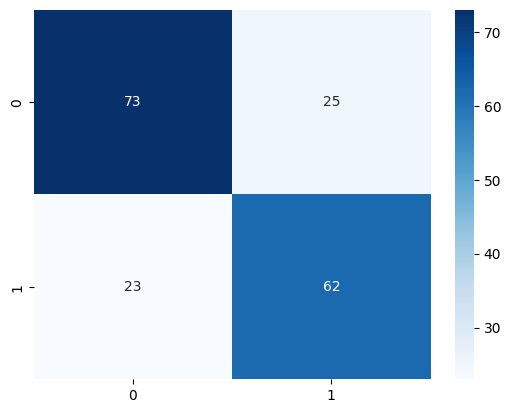

In [ ]:
from sklearn.metrics import confusion_matrix

# get confusion matrix from y_actual and y_predicted_lr
confusionMatrix = confusion_matrix(y_actual, y_predicted_lr)

import seaborn
seaborn.heatmap(confusionMatrix, annot=True, cmap='Blues')

print(confusionMatrix)

<Axes: >

[[ 0 98]
 [ 0 85]]


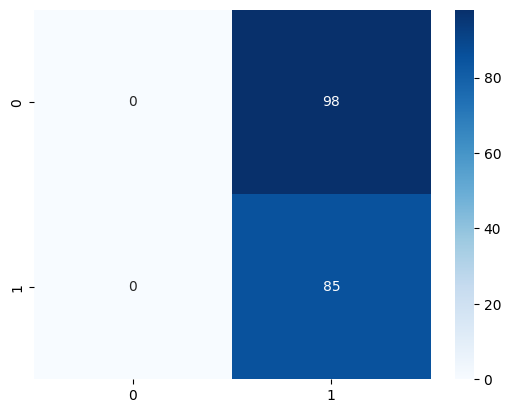

In [ ]:
confusionMatrix = confusion_matrix(y_actual, y_predicted_mlp)

seaborn.heatmap(confusionMatrix, annot=True, cmap='Blues')

print(confusionMatrix)

In [ ]:
#flattens array
TN, FP, FN, TP = confusionMatrix.ravel()

#prints out individual values
print(f'True Positives (TP): {TP}')
print(f'False Negatives (FN): {FN}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')

True Positives (TP): 85
False Negatives (FN): 0
True Negatives (TN): 0
False Positives (FP): 98


### Use scikit-learn's classification model

In [ ]:
from sklearn.metrics import classification_report
# logistic regression classification report
print(classification_report(y_actual, y_predicted_lr))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75        98
           1       0.71      0.73      0.72        85

    accuracy                           0.74       183
   macro avg       0.74      0.74      0.74       183
weighted avg       0.74      0.74      0.74       183



In [ ]:
# mlp classification report
print(classification_report(y_actual, y_predicted_mlp))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        98
           1       0.46      1.00      0.63        85

    accuracy                           0.46       183
   macro avg       0.23      0.50      0.32       183
weighted avg       0.22      0.46      0.29       183



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Visualizations

In [ ]:
# get data for each variable we want to analyze
age = test_df['Age']
cholesterol = test_df['Cholesterol']
maxHR = test_df['MaxHR']
exerciseAngina = test_df['ExerciseAngina']
heart_disease = test_df['HeartDisease']

#### Max HR vs Heart Disease

<ipython-input-13-105d4e1361e0>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = test_df.groupby(['MaxHR_bin', 'HeartDisease']).size().unstack(fill_value=0)


Text(0.5, 0, 'MaxHR Range')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'MaxHR Ranges vs Heart Disease')

[Text(0, 0, '80-100'),
 Text(1, 0, '101-120'),
 Text(2, 0, '121-140'),
 Text(3, 0, '141-160'),
 Text(4, 0, '161-180'),
 Text(5, 0, '181-200')]

(0.0, 46.0)

[Text(0, 2, '0'),
 Text(0, 2, '2'),
 Text(0, 2, '9'),
 Text(0, 2, '35'),
 Text(0, 2, '41'),
 Text(0, 2, '10')]

[Text(0, 2, '6'),
 Text(0, 2, '10'),
 Text(0, 2, '21'),
 Text(0, 2, '31'),
 Text(0, 2, '15'),
 Text(0, 2, '2')]

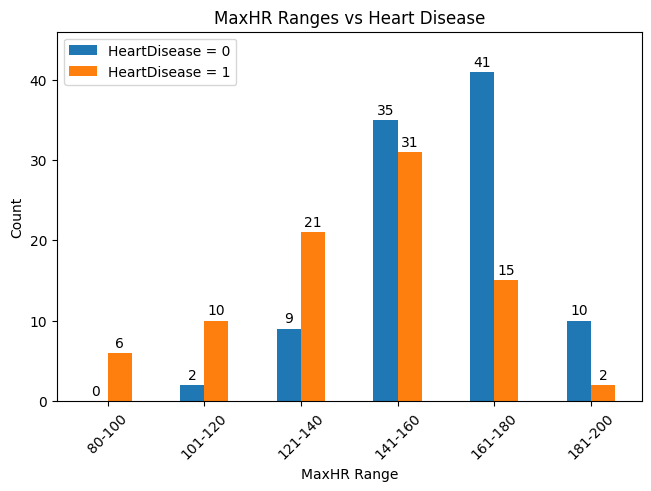

In [ ]:
#MaxHR
import matplotlib.pyplot as plt
import numpy as np

# MaxHR = (maxHR)
# # Modify data to have heart_disease as keys and counts as values
# data = heart_disease.value_counts().to_dict()

bins = [80,100, 120, 140, 160, 180, 200]
labels = ['80-100', '101-120', '121-140', '141-160','161-180', '181-200']

test_df['MaxHR_bin'] = pd.cut(test_df['MaxHR'], bins=bins, labels=labels, include_lowest=True)

grouped = test_df.groupby(['MaxHR_bin', 'HeartDisease']).size().unstack(fill_value=0)


x = np.arange(len(grouped))  # Update x to match the number of categories
width = 0.25

fix, ax = plt.subplots(layout='constrained')

rects1 = ax.bar(x - width/2, grouped[0], width, label='HeartDisease = 0')
rects2 = ax.bar(x + width/2, grouped[1], width, label='HeartDisease = 1')

ax.set_xlabel('MaxHR Range')
ax.set_ylabel('Count')
ax.set_title('MaxHR Ranges vs Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=45)
ax.legend()
ax.set_ylim(0, grouped.values.max() + 5)


ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)


plt.show()

#### Exercise Angina vs Heart Disease

Text(0.5, 0, 'Exercise Angina')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Exercise Angina vs Heart Disease')

[Text(0, 0, 'N'), Text(1, 0, 'Y')]

(0.0, 94.0)

[Text(0, 2, '89'), Text(0, 2, '9')]

[Text(0, 2, '35'), Text(0, 2, '50')]

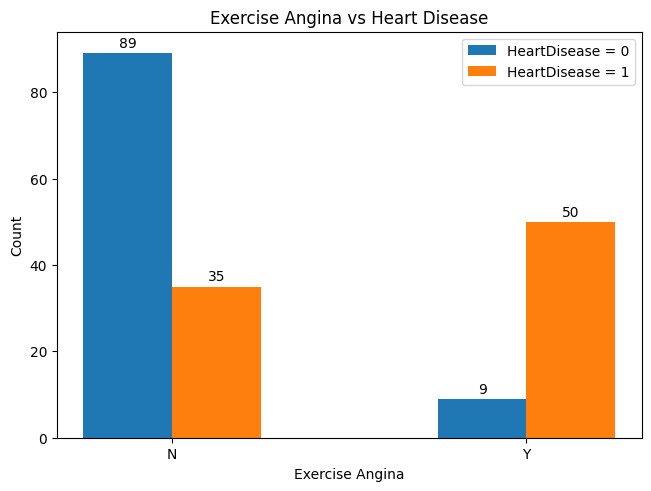

In [ ]:
#ExerciseAngina

grouped = test_df.groupby(['ExerciseAngina', 'HeartDisease']).size().unstack(fill_value=0)

x = np.arange(len(grouped))  # Update x to match the number of categories
width = 0.25

fix, ax = plt.subplots(layout='constrained')

rects1 = ax.bar(x - width/2, grouped[0], width, label='HeartDisease = 0')
rects2 = ax.bar(x + width/2, grouped[1], width, label='HeartDisease = 1')

ax.set_xlabel('Exercise Angina')
ax.set_ylabel('Count')
ax.set_title('Exercise Angina vs Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index)
ax.legend()
ax.set_ylim(0, grouped.values.max() + 5)


ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)


plt.show()


#### Cholesterol vs Heart Disease

,Cholesterol
count,183.000000
mean,245.808743
std,47.913860
min,131.000000
25%,211.500000
50%,243.000000
75%,275.500000
max,409.000000


<ipython-input-15-de5abb8f91ba>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = test_df.groupby(['Cholesterol_bin', 'HeartDisease']).size().unstack(fill_value=0)


Text(0.5, 0, 'Cholesterol Range')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Cholesterol vs Heart Disease')

[Text(0, 0, '130-170'),
 Text(1, 0, '171-210'),
 Text(2, 0, '211-250'),
 Text(3, 0, '251-290'),
 Text(4, 0, '291-330'),
 Text(5, 0, '331-370'),
 Text(6, 0, '371-410')]

(0.0, 41.0)

[Text(0, 2, '2'),
 Text(0, 2, '22'),
 Text(0, 2, '36'),
 Text(0, 2, '22'),
 Text(0, 2, '12'),
 Text(0, 2, '3'),
 Text(0, 2, '1')]

[Text(0, 2, '4'),
 Text(0, 2, '16'),
 Text(0, 2, '24'),
 Text(0, 2, '26'),
 Text(0, 2, '10'),
 Text(0, 2, '4'),
 Text(0, 2, '1')]

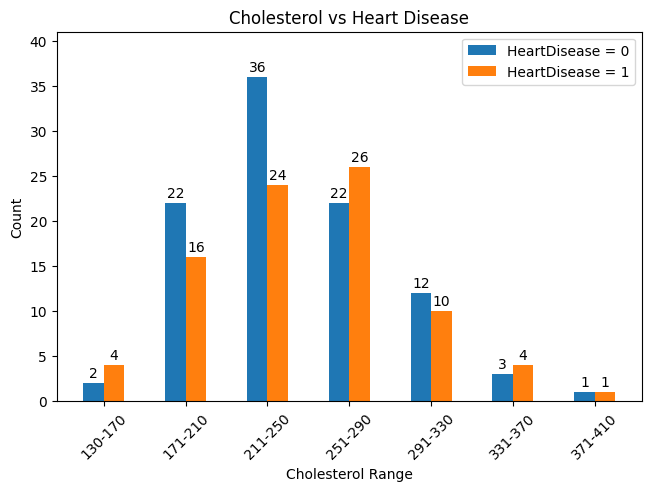

In [ ]:
# Cholesterol

# look at range of data to figure out bin sizes
cholesterol.describe()

# set bin size to 20 and label bins
bins = [130, 170, 210, 250, 290, 330, 370, 410]
labels = ['130-170', '171-210', '211-250', '251-290','291-330', '331-370', '371-410']

# sort data into bins
test_df['Cholesterol_bin'] = pd.cut(cholesterol, bins=bins, labels=labels, include_lowest=True)

# group by classification of heart disease
grouped = test_df.groupby(['Cholesterol_bin', 'HeartDisease']).size().unstack(fill_value=0)


# label locations
x = np.arange(len(grouped))
# width of bars
width = 0.25

fix, ax = plt.subplots(layout='constrained')

rects1 = ax.bar(x - width/2, grouped[0], width, label='HeartDisease = 0')
rects2 = ax.bar(x + width/2, grouped[1], width, label='HeartDisease = 1')

# set up grouped bar chart
ax.set_xlabel('Cholesterol Range')
ax.set_ylabel('Count')
ax.set_title('Cholesterol vs Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=45)
ax.legend()
ax.set_ylim(0, grouped.values.max() + 5)


ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

plt.show()

#### Age vs Heart Disease

,Age
count,183.000000
mean,54.333333
std,9.081640
min,29.000000
25%,49.000000
50%,55.000000
75%,61.000000
max,77.000000


<ipython-input-16-d78cffda2a73>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = test_df.groupby(['age_bin', 'HeartDisease']).size().unstack(fill_value=0)


Text(0.5, 0, 'Age Range')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age vs Heart Disease')

[Text(0, 0, '25-36'),
 Text(1, 0, '37-47'),
 Text(2, 0, '48-58'),
 Text(3, 0, '59-69'),
 Text(4, 0, '70-80')]

(0.0, 53.0)

[Text(0, 2, '5'),
 Text(0, 2, '26'),
 Text(0, 2, '48'),
 Text(0, 2, '18'),
 Text(0, 2, '1')]

[Text(0, 2, '1'),
 Text(0, 2, '11'),
 Text(0, 2, '33'),
 Text(0, 2, '37'),
 Text(0, 2, '3')]

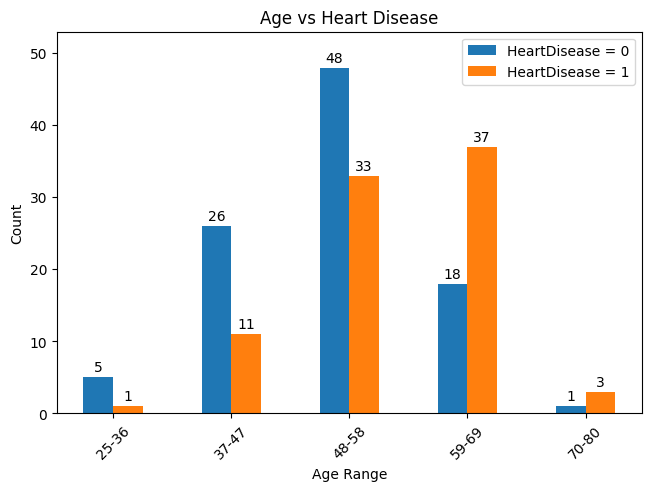

In [ ]:
# Age

# look at range of data to figure out bin sizes
age.describe()

# set bin size to 20 and label bins
bins = [25, 36, 47, 58, 69, 80]
labels = ['25-36', '37-47', '48-58', '59-69',  '70-80']

# sort data into bins
test_df['age_bin'] = pd.cut(age, bins=bins, labels=labels, include_lowest=True)

# group by classification of heart disease
grouped = test_df.groupby(['age_bin', 'HeartDisease']).size().unstack(fill_value=0)

# label locations
x = np.arange(len(grouped))
# width of bars
width = 0.25

fix, ax = plt.subplots(layout='constrained')

rects1 = ax.bar(x - width/2, grouped[0], width, label='HeartDisease = 0')
rects2 = ax.bar(x + width/2, grouped[1], width, label='HeartDisease = 1')

# set up grouped bar chart
ax.set_xlabel('Age Range')
ax.set_ylabel('Count')
ax.set_title('Age vs Heart Disease')
ax.set_xticks(x)
ax.set_xticklabels(grouped.index, rotation=45)
ax.legend()
ax.set_ylim(0, grouped.values.max() + 5)


ax.bar_label(rects1, padding=2)
ax.bar_label(rects2, padding=2)

plt.show()

### LIME Method
#### This chart explains both models' predictions and provides insight into which attributes contribute most to the predicted outcome.

In [ ]:
# LIME Method implemented for the chosen model: logistic regression
!pip install lime
import lime
from lime import lime_tabular
import numpy

# Create the explainer
explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_train_features.to_numpy(),
    feature_names = X_train_features.columns,
    class_names = ['No Heart Disease', 'Heart Disease'],
    mode = 'classification'
)

# Define the test instances with numerically-transformed data
Age = 49
ChestPainType = 2   # 'NAP'
RestingBP = 120
FastingBS = 0
RestingECG = 0   # 'Normal'
MaxHR = 139
ExerciseAngina = 0   # 'N'
ST_Slope = 1    # 'Flat'

input_data = numpy.array([Age, ChestPainType, RestingBP, FastingBS, RestingECG, MaxHR, ExerciseAngina, ST_Slope])

# Run LIME
exp = explainer.explain_instance(
    data_row = input_data,
    predict_fn = lr_classifier.predict_proba
)

exp.show_in_notebook(show_table=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=57cb4d9942047edad384931b32019c9954d9b6f6958d5c6ec05a7bdf7274cc9b
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [19]:
!pip install gradio
import matplotlib.pyplot as plt
import joblib
lr_classifier = joblib.load("heart_disease_best_model.joblib")

import gradio as gr
import numpy as np

cp_map = {'TA': 0, 'ATA': 1, 'NAP': 2, 'ASY': 3}
ecg_map = {'Normal': 0, 'ST': 1, 'LVH': 2}
slope_map = {'Up': 0, 'Flat': 1, 'Down': 2}
angina_map = {'Yes': 1, 'No': 0}

def featurize_single(age, chest_pain, resting_bp, fasting_bs, rest_ecg, max_hr, exercise_angina, st_slope):
    try:
        encoded = np.array([[
            cp_map[chest_pain],
            ecg_map[rest_ecg],
            angina_map[exercise_angina],
            slope_map[st_slope],
            age,
            resting_bp,
            1 if fasting_bs == "Yes" else 0,
            max_hr
        ]])
        return encoded
    except Exception as e:
        return f"Encoding error: {str(e)}"

def predict_heart_disease(age, chest_pain, resting_bp, fasting_bs, rest_ecg, max_hr, exercise_angina, st_slope):
    input_data = featurize_single(age, chest_pain, resting_bp, fasting_bs, rest_ecg, max_hr, exercise_angina, st_slope)

    if isinstance(input_data, str):
        return input_data, None

    proba = lr_classifier.predict_proba(input_data)[0]

    if proba[1] >= 0.5:
        result = " Likely to have heart disease"
        conf = proba[1]
    else:
        result = " Unlikely to have heart disease"
        conf = proba[0]

    text_output = f"{result}\nConfidence: {conf:.2%}"

    fig, ax = plt.subplots()
    ax.bar(["No Heart Disease", "Heart Disease"], proba, color=["green", "red"])
    ax.set_ylim(0, 1)
    ax.set_ylabel("Probability")
    ax.set_title("Prediction Confidence")

    return text_output, fig

demo = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Slider(25, 80, value=50, label="Age"),
        gr.Dropdown(choices=list(cp_map.keys()), label="Chest Pain Type"),
        gr.Slider(80, 200, value=120, label="Resting Blood Pressure"),
        gr.Radio(["No", "Yes"], label="Fasting Blood Sugar > 120 mg/dl"),
        gr.Dropdown(choices=list(ecg_map.keys()), label="Resting ECG"),
        gr.Slider(60, 200, value=130, label="Max Heart Rate"),
        gr.Radio(["No", "Yes"], label="Exercise-Induced Angina"),
        gr.Dropdown(choices=list(slope_map.keys()), label="ST Slope")
    ],
    outputs=[gr.Textbox(label="Result"), gr.Plot(label="Confidence Chart")],

    title=" Heart Disease Risk Predictor",
    description="Enter patient info to estimate heart disease risk using a trained logistic regression model."
)

demo.launch(share=True)



Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d9f0c3dad818c03414.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
